# Prediction of customers' travel pattern

- Tune ML models
- Using Logistic Clf

# 1)-Importing key modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
# For processing
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy
from collections import Counter
import datetime as dt
from datetime import datetime
import seaborn as sns
from pprint import pprint
%matplotlib inline


In [2]:
# For modeling building and tunning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.under_sampling import NearMiss

Using TensorFlow backend.


In [3]:
# for evaluation

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [4]:
from datetime import date
import datetime as dt

# 2)-Loading data

In [5]:
df = pd.read_csv('selected_feature.csv')
df.shape

(45805, 515)

In [6]:
df.head()

,event_type,distance,num_family,len_jour,ts_hour,origin_ADB,origin_ADL,origin_AER,origin_AGP,origin_AKL,...,dest_YEG,dest_YMQ,dest_YOW,dest_YTO,dest_YUL,dest_YVR,dest_YWG,dest_YYC,dest_YYZ,dest_ZRH
0,0,5834.154716,7,6.0,11,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,6525.926149,4,21.0,20,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,469.781624,2,3.0,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1498.817537,1,3.0,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2921.339028,4,6.0,22,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_model=df.copy()

In [8]:
y=df_model["event_type"]
features=df_model.drop(['event_type'], axis=1)
X = StandardScaler().fit_transform(features)

In [9]:
nm = NearMiss()
X_under,y_under=nm.fit_sample(X,y)

# 3.GridSearchCV using Log Classifier Model

In [10]:
lr = LogisticRegression(random_state=5, class_weight='balanced',penalty='l2')

In [11]:
dual=[True,False]
max_iter=[100,110,120,130,140]
C = [1.0,1.5,2.0,2.5]
param_grid = dict(dual=dual,max_iter=max_iter,C=C)

In [12]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=5)

In [13]:
grid_search = GridSearchCV(lr,param_grid, n_jobs=-1, scoring='precision', cv=skf)
grid_search = grid_search.fit(X, y)
grid_search.best_estimator_

LogisticRegression(C=1.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=140, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
grid_search.best_score_

0.05385127794469115

In [15]:
print("tuned hpyerparameters :(best parameters) ",grid_search.best_params_)

tuned hpyerparameters :(best parameters)  {'C': 1.5, 'dual': False, 'max_iter': 140}


In [16]:
grid_search.best_estimator_

LogisticRegression(C=1.5, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=140, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
grid_search.cv_results_

{'mean_fit_time': array([ 1.06514125,  1.08602519,  0.90765939,  0.76415377,  0.77803359,
        22.75487032, 23.99804959, 26.78803835, 29.41344523, 27.92558026,
         1.75538721,  1.11904912,  1.08852744,  1.0476614 ,  0.95055165,
        21.67740321, 23.15861278, 24.42167621, 24.76697979, 21.87006598,
         2.30993876,  1.40908246,  1.14324222,  1.07352662,  1.01415639,
        21.89063463, 23.37204204, 25.63400159, 27.07986627, 23.09552341,
         2.52006125,  1.58214822,  1.29240723,  1.17106776,  1.2299427 ,
        21.9899611 , 23.97158046, 25.86118975, 27.13008366, 23.35505438]),
 'std_fit_time': array([2.84461883e-02, 3.59483298e-02, 1.53871991e-01, 1.67794269e-02,
        1.40685313e-02, 3.04086649e-01, 1.42800815e-01, 1.31792262e+00,
        5.18170151e-01, 3.49743011e+00, 3.14349319e-01, 5.51411269e-03,
        1.50837093e-02, 1.10741930e-02, 1.22134297e-02, 7.01636716e-01,
        6.92568857e-01, 2.07548897e+00, 2.07874422e+00, 4.85278674e+00,
        5.97878985e-0

# 4)-predict_proba

In [24]:
grid_search.predict_proba(X_test)[0:10, :]

array([[0.47582436, 0.52417564],
       [0.7366389 , 0.2633611 ],
       [0.42185331, 0.57814669],
       [0.62896714, 0.37103286],
       [0.63085819, 0.36914181],
       [0.28081807, 0.71918193],
       [0.33328292, 0.66671708],
       [0.38498986, 0.61501014],
       [0.4870752 , 0.5129248 ],
       [0.59663543, 0.40336457]])

In [26]:
pred_prob_zero = grid_search.predict_proba(X_test)[:, 0]
print(pred_prob_zero[:5])

[0.47582436 0.7366389  0.42185331 0.62896714 0.63085819]


Text(0, 0.5, 'Frequency')

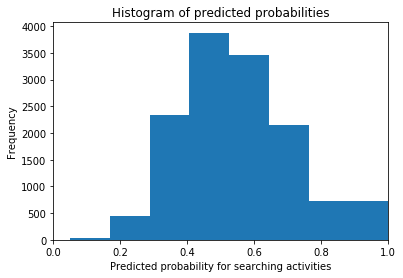

In [27]:
# histogram of predicted probabilities for search activities
plt.hist(pred_prob_zero, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for searching activities')
plt.ylabel('Frequency')

In [28]:
pred_prob_cl_one = grid_search.predict_proba(X_test)[:, 1]
print(pred_prob_cl_one[:5])

[0.52417564 0.2633611  0.57814669 0.37103286 0.36914181]


Text(0, 0.5, 'Frequency')

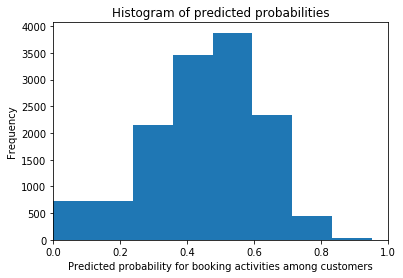

In [29]:
# histogram of predicted probabilities for churned customers
plt.hist(pred_prob_cl_one, bins=8)
plt.xlim(0, 1)
plt.title('Histogram of predicted probabilities')
plt.xlabel('Predicted probability for booking activities among customers')
plt.ylabel('Frequency')

These are the probabilities that for booking and search acitivities among customers.

# 5)-ROC & AUC

In [30]:
from sklearn.metrics import roc_curve
roc_score=roc_curve(y_test, pred_prob_cl_one)

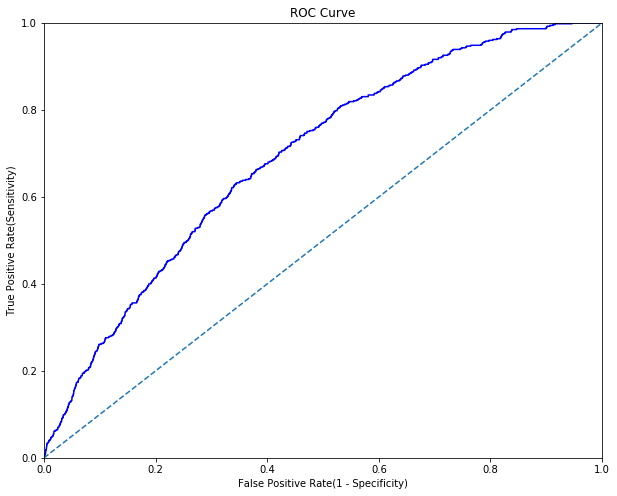

In [31]:
from sklearn.metrics import roc_curve
fpr, tpr, thres = roc_curve(y_test, pred_prob_cl_one)


def _plot_roc_curve(fpr, tpr, thres):
    roc = plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', label = 'ROC')
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate(1 - Specificity)')
    plt.ylabel('True Positive Rate(Sensitivity)')
    plt.title('ROC Curve')
    return roc
p1 = _plot_roc_curve(fpr, tpr, thres)

In [32]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.692778276173903

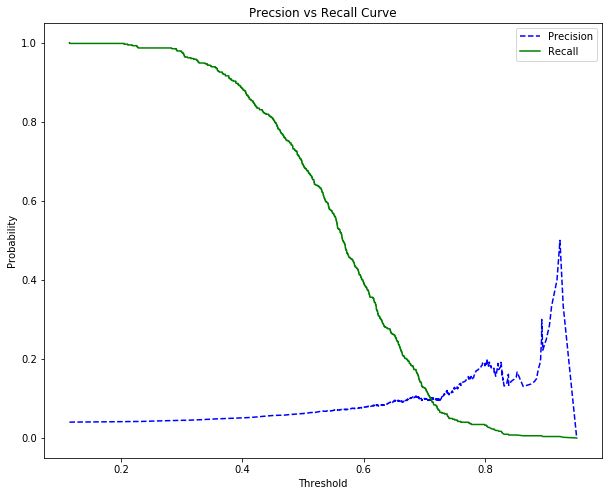

In [33]:
from sklearn.metrics import roc_curve, precision_recall_curve
prec, rec, thres = precision_recall_curve(y_test, pred_prob_cl_one)

def _plot_prec_rec_curve(prec, rec, thres):
    plot_pr = plt.figure(figsize = (10, 8))
    plt.plot(thres, prec[:-1], 'b--', label = 'Precision')
    plt.plot(thres, rec[:-1], 'g-', label = 'Recall')
    plt.xlabel('Threshold')
    plt.ylabel('Probability')
    plt.title('Precsion vs Recall Curve')
    plt.legend()
    #return plot_pr(it creates duplicate graph)

_plot_prec_rec_curve(prec, rec, thres)

Our threshold is almost at 0.5. If we go to lower values we can get better recall values. Higher values will improve precision but, recall will go very low. Model is still not giving best of result. But, this is better tha what we got

**END OF NOTEBOOK**